<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Andrés Ramírez Villanueva y Santiago Romero Riggen.

**Fecha:** 30 de Junio del 2021.

**Expediente** : IF726061, IF715099.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/SantiRiggen/Tarea8_SRomero_ARamirez


# Tarea 8: Clase 14

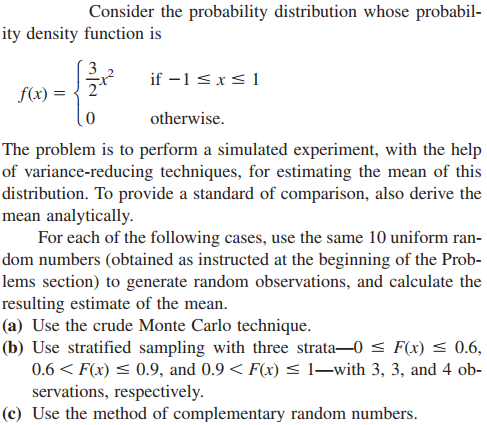
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

### Código de solución estudiante 1

In [1]:
# Código de solución Santiago Romero
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Términos
N = 10
# Función
fx = lambda x: 1.5*x**2 if -1<=x<=1 else 0
# Función inversa
f_inversa = lambda u: (2*u)**(1/3) if u > 0.5 else -(1-2*u)**(1/3)

In [3]:
# Montecarlo
np.random.seed(1000)
num = np.random.uniform(0, 1, N)
mcarlo = np.array([f_inversa(n) for n in num])
uno = print('Media usando Montecarlo:', round(np.mean(mcarlo), 4));
uno

Media usando Montecarlo: 0.0275


In [4]:
# Muestreo estratificado
np.random.seed(1000)
w = [0.5, 1, 4]
# Num aleatorios en intervalos
R1 = np.random.uniform(0, .6, 3)
R2 = np.random.uniform(0.6, .9, 3)
R3 = np.random.uniform(0.9, 1, 4)
R = [R1,R2,R3]

ME = np.concatenate(list(map(lambda x, wi: x/wi,
                            [np.array([f_inversa(i) for i in ri]) 
                             for ri in R] , w)))

dos = print('Media usando Muestreo Estratificado: ', round(np.mean(ME), 4))
dos

Media usando Muestreo Estratificado:  0.366


In [5]:
# Nos. complementarios
np.random.seed(1000)
U = np.random.uniform(0, 1, int(.5*N))
UC = 1 - U

Media_c = list(map(f_inversa, np.concatenate([U, UC])))

tres = print('La media usando números complememntarios: ',
             round(np.mean(Media_c), 4))
tres

La media usando números complememntarios:  0.1965


In [6]:
# B-Estratos
np.random.seed(1000)

def muestreo_est(N):
    B = N
    U = np.random.rand(N)
    i = np.arange(0, B)
    return (U + i) / B

N = [2,4,6,10]
estratos = [muestreo_est(i) for i in N]

muestreo = [[f_inversa(j) for j in i] for i in estratos]
m2 = np.array(muestreo[0])
m4 = np.array(muestreo[1])
m6 = np.array(muestreo[2])
m10 = np.array(muestreo[3])

print('La media usando:')
print('- 2 estratos =', round(np.mean(m2), 5))
print('- 4 estratos =', round(np.mean(m4), 5))
print('- 6 estratos =', round(np.mean(m6), 5))
print('- 10 estratos =', round(np.mean(m10), 5))

La media usando:
- 2 estratos = 0.16732
- 4 estratos = 0.21384
- 6 estratos = 0.16756
- 10 estratos = 0.2079


### Código de solución estudiante 2

In [7]:
# Código de solución Andrés Ramírez Villanueva
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inciso a)

In [8]:
# Con montecarlo

def estratos(a, b, n):
    i = np.arange(0,n)
    u2 = np.random.uniform(a,b,n)
    v = (u2+i)/n
    return v

f_x = lambda x: (3/2)*x**2 if x>= -1 and x <= 1 else 0
x_i = lambda u: (2*(u-(1/2)))**(1/3) if u > 0.5 else -(2*((1/2)-u))**(1/3)

np.random.seed(100)

n = 10

vector =  np.random.uniform(0, 1, n)

muestra = np.asarray(list(map(x_i, vector)))

print(muestra.mean())


-0.06783350231646393


# Inciso b)

In [9]:
# Estratificado

n_1 = 3
n_2 = 3
n_3 = 4

suma = n_1+n_2+n_3

r = [np.random.uniform(0, 0.6, n_1), np.random.uniform(0.6, 0.9, n_2), np.random.uniform(0.9, 1, n_3)]

w = [(n_1/suma/0.6), (n_2/suma/0.3), (n_3/suma/0.1)]

muestra_2 = list(map(lambda x: np.asarray(list(map(x_i, x))), r))

resul = list(map(lambda x, wi: x/wi, muestra_2, w))

resul = np.concatenate(resul)

print(np.mean(resul))

0.03915223601893479


# Inciso c)

In [10]:
# Números aleatorios complementarios

u_1 = np.random.rand(5)

u_2 = 1-u_1

U = [u_1, u_2]

np.mean(list(map(lambda u: np.asarray(list(map(x_i, u))), U)))

3.3306690738754695e-17

# Inciso d)

In [11]:
# Con b estratos

b = [2, 4, 6, 10]

a =  np.asarray(list(map(lambda x: estratos(0, 1, x), b)))

muestras = np.asarray(list(map(lambda x: np.asarray(list(map(x_i, x))), a)))

print([np.mean(muestras[x]) for x in range(4)])

[-0.33873197152712575, -0.0746433668662757, -0.04854777566747912, 0.00287336554170371]
